<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [8]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [9]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

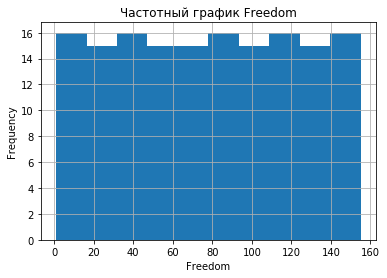

In [15]:
#Частотный график: Freedom 

n, bins, patches = plt.hist(df['Freedom'], 10)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

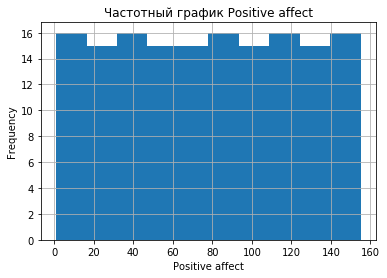

In [19]:
#Частотный график: positive affect 
n, bins, patches = plt.hist(df['Positive affect'], 10)

plt.xlabel('Positive affect')
plt.ylabel('Frequency')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [21]:
#Проверка и удаление пустых значение в переменной Freedom
df.Freedom.isnull().sum()
df = df.dropna(subset=['Freedom'])
df.Freedom.isnull().sum()             #проверка

0

In [22]:
#медиана
print('Медиана: ', statistics.median(df.Freedom))

#математическое ожидание (среднее значение)
print('Математическое ожидание: ', statistics.mean(df.Freedom))

#стандартное отклонение
print('Стандартное отклонение: ' , statistics.pstdev(df.Freedom))

#дисперсия
print('Дисперсия: ' , statistics.pvariance(df.Freedom))

#минимум
print('Минимум: ' , df.Freedom.min())

#максимум
print('Максимум: ', df.Freedom.max())

#размах
print('Размах: ', df.Freedom.max() - df.Freedom.min())

Медиана:  78.0
Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах:  154.0


Почему нельзя найти моду?

Значения перемещнной Freedom уникальны, поэтому мода не может быть определена

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

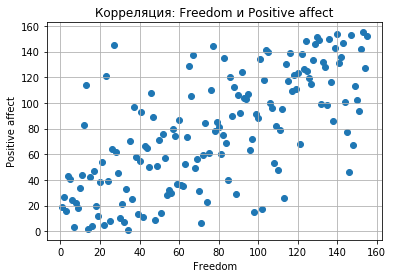

In [26]:
#Построение зависимости между Freedom и positive affect
freedom = df['Freedom']
positive_affect = df['Positive affect']

plt.scatter(freedom, positive_affect)
plt.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Корреляция: Freedom и Positive affect')
plt.show()

In [32]:
#Определение коэффициента Пирсона

from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент Пирсона = ', corr)
print('Положительное значение коэффиента говорит о прямой зависимости между переменными, а отрицательное - об обратной')

Коэффициент Пирсона =  0.6817698430601657
Положительное значение коэффиента говорит о прямой зависимости между переменными, а отрицательное - об обратной


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [33]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


Построить матрицу корреляций для всех колонок таблицы

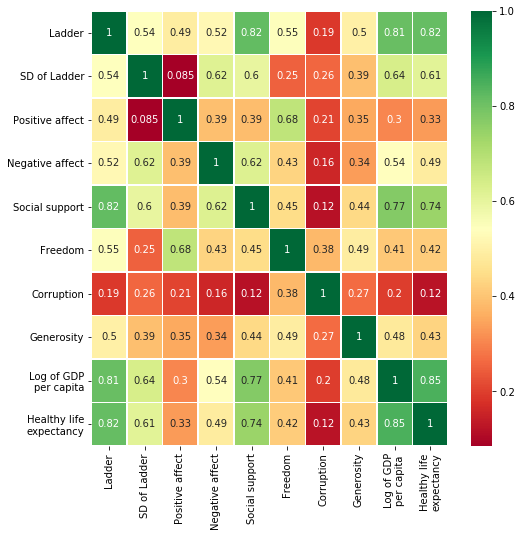

In [34]:
#Лекционный шаблон
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(8,8)
plt.show()

Загрузить таблицу цен на авокадо: 

In [42]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

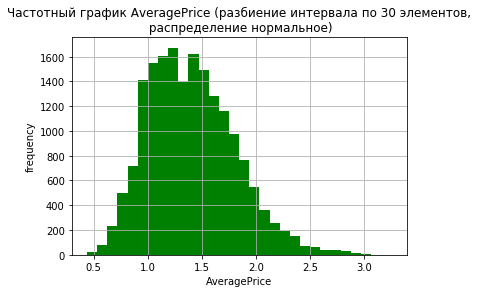

In [43]:
n, bins, patches = plt.hist(df['AveragePrice'], 30, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 30 элементов,\n распределение нормальное)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [44]:
print('Коэффициент ПИРСОНА:')
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print('колонки 4046 и AveragePrice: %.3f' % corr)
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
print('колонки 4225 и AveragePrice: %.3f' % corr)
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
print('колонки 4770 и AveragePrice: %.3f' % corr)

print('\nКоэффициент СПИРМЕНА:')
coef, p = sts.spearmanr(df['4046'], df['AveragePrice'])
print('колонки 4046 и AveragePrice: %.3f' % coef)
coef, p = sts.spearmanr(df['4225'], df['AveragePrice'])
print('колонки 4225 и AveragePrice: %.3f' % coef)
coef, p = sts.spearmanr(df['4770'], df['AveragePrice'])
print('колонки 4770 и AveragePrice: %.3f' % coef)

print('\nКоэффициент КЕНДАЛЛА:')
coef, p = sts.kendalltau(df['4046'], df['AveragePrice'])
print('колонки 4046 и AveragePrice: %.3f' % coef)
coef, p = sts.kendalltau(df['4225'], df['AveragePrice'])
print('колонки 4225 и AveragePrice: %.3f' % coef)
coef, p = sts.kendalltau(df['4770'], df['AveragePrice'])
print('колонки 4770 и AveragePrice: %.3f' % coef)

Коэффициент ПИРСОНА:
колонки 4046 и AveragePrice: -0.208
колонки 4225 и AveragePrice: -0.173
колонки 4770 и AveragePrice: -0.179

Коэффициент СПИРМЕНА:
колонки 4046 и AveragePrice: -0.596
колонки 4225 и AveragePrice: -0.514
колонки 4770 и AveragePrice: -0.533

Коэффициент КЕНДАЛЛА:
колонки 4046 и AveragePrice: -0.417
колонки 4225 и AveragePrice: -0.344
колонки 4770 и AveragePrice: -0.375


Между 4046, 4225, 4770 и Average Price обратная корреляция. Коэффиценты корреляции низки, следовательно зависимость слабая. Относительно более высокие значения коэффициентов Спирмена и Кендала, говорят о более выраженной ранговой зависимости.